### Evaluación del modelo en condiciones aproximadas a producción
(estimación de rentabilidad del sistema)

#### Importamos librerías necesarias

In [1]:
import sys
sys.path.append("../") # go to parent dir
sys.path.append("../../") # go to parent dir

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Programacion\\PD\\forecasts'

In [4]:
import pickle
from modelos import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
df_2024 = pd.read_parquet("../clean/df_2024.parquet")
df_2024[(df_2024.dia == 7) & (df_2024.mes == 5)]

,anio,mes,dia,moonphase,hora,temp,dewPt,heat_index,rh,pressure,...,wdir_VAR,wdir_W,wdir_WNW,wdir_WSW,Vviento,AlturaOlas,PeriodoOlas,Temperatura,Lluvia,Nubosidad
1388,2024,5,7,0.0,7,50.0,46.0,50.0,87.0,30.080,...,0,0,0,0,8,0.6,8,7,0.0,58
1389,2024,5,7,0.0,8,51.0,46.0,51.0,84.5,30.080,...,0,0,0,0,9,0.6,8,9,0.0,100
1390,2024,5,7,0.0,9,53.0,47.0,53.0,82.0,30.110,...,0,0,0,0,8,0.6,8,10,0.0,100
1391,2024,5,7,0.0,10,54.0,47.0,54.0,79.5,30.110,...,1,0,0,0,7,0.6,8,11,0.0,100
1392,2024,5,7,0.0,11,55.0,48.0,55.0,77.0,30.125,...,1,0,0,0,5,0.5,8,12,0.0,100
1393,2024,5,7,0.0,13,58.0,50.0,58.0,74.5,30.140,...,0,1,0,1,3,0.5,8,14,0.0,98
1394,2024,5,7,0.0,14,60.0,50.0,60.0,70.0,30.140,...,0,0,0,1,5,0.5,8,14,0.0,77
1395,2024,5,7,0.0,15,58.0,47.0,58.0,67.0,30.155,...,0,0,0,0,7,0.5,8,14,0.0,43
1396,2024,5,7,0.0,16,57.0,48.0,57.0,72.0,30.170,...,0,0,0,0,7,0.5,8,13,0.0,63
1397,2024,5,7,0.0,17,55.0,48.0,55.0,77.0,30.170,...,0,0,0,0,6,0.5,8,12,0.0,89


In [6]:
df_forecast = pd.read_csv("../clean/forecast_merged.csv")
df_forecast[(df_forecast.dia == 7)&(df_forecast.mes == 5)]

,Vviento,PeriodoOlas,Nubosidad,Lluvia,antelacion,hora,dia,anio,mes,temp,...,wdir_SE,wdir_SSE,wdir_SSW,wdir_SW,wdir_VAR,wdir_W,wdir_WNW,wdir_WSW,moonphase,AlturaOlas
517,8,8,0,NaN,27,3,7,2024,5,50,...,0,0,0,0,0,0,0,0,0.0,0.6
518,8,8,0,NaN,29,5,7,2024,5,47,...,0,0,0,0,0,0,0,0,0.0,0.6
519,9,8,0,NaN,31,7,7,2024,5,47,...,0,0,0,0,0,0,0,0,0.0,0.6
520,9,8,0,NaN,33,9,7,2024,5,51,...,0,0,0,0,0,0,0,0,0.0,0.6
521,6,8,23,NaN,35,11,7,2024,5,56,...,0,0,0,0,0,0,0,0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,4,8,31,NaN,14,13,7,2024,5,60,...,0,0,0,0,0,0,0,1,0.0,0.5
803,7,8,36,NaN,16,15,7,2024,5,61,...,0,0,1,0,0,0,0,0,0.0,0.5
804,7,8,48,NaN,18,17,7,2024,5,60,...,0,0,1,0,0,0,0,0,0.0,0.5
805,7,8,46,NaN,20,19,7,2024,5,57,...,0,0,1,0,0,0,0,0,0.0,0.5


Cargamos los datos de forecast y las observaciones que hemos usado para entrenamiento, para poder sacar el orden de las columnas

In [7]:
df_observ = pd.read_parquet("../clean/df_definitivo.parquet")

# eliminamos repetidas, columnas que no participan en el modelo
df_observ.drop(columns=['Temperatura', 'wspd'], inplace=True) 

df_forecast = pd.read_csv('../clean/forecast_merged.csv')

In [8]:
df_forecast.columns

Index(['Vviento', 'PeriodoOlas', 'Nubosidad', 'Lluvia', 'antelacion', 'hora',
       'dia', 'anio', 'mes', 'temp', 'dewPt', 'heat_index', 'rh', 'pressure',
       'vis', 'wc', 'feels_like', 'uv_index', 'wdir_E', 'wdir_ENE', 'wdir_ESE',
       'wdir_N', 'wdir_NE', 'wdir_NNE', 'wdir_NNW', 'wdir_NW', 'wdir_S',
       'wdir_SE', 'wdir_SSE', 'wdir_SSW', 'wdir_SW', 'wdir_VAR', 'wdir_W',
       'wdir_WNW', 'wdir_WSW', 'moonphase', 'AlturaOlas'],
      dtype='object')

In [9]:
df_forecast[["anio", "mes", "dia", "hora","antelacion", "moonphase", "AlturaOlas"]].iloc[20:45,:]

,anio,mes,dia,hora,antelacion,moonphase,AlturaOlas
20,2024,5,3,15,2,0.84,0.7
21,2024,5,3,16,3,0.84,0.6
22,2024,5,3,17,4,0.84,0.6
23,2024,5,3,18,5,0.84,0.6
24,2024,5,3,19,6,0.84,0.6
25,2024,5,3,20,7,0.84,0.6
26,2024,5,3,21,8,0.84,0.7
27,2024,5,3,22,9,0.84,0.6
28,2024,5,3,23,10,0.84,0.7
29,2024,5,3,14,0,0.84,0.7


##### Para mantener el mismo orden de columnas en el input del modelo

In [10]:
antelaciones = df_forecast['antelacion'] # guardamos para evaluar posteriormente
df_forecast = df_forecast[df_observ.columns]

#### Separamos en explicativas y respuesta

In [11]:
X, y = df_forecast.drop(columns=['AlturaOlas', 'anio', 'mes', 'dia', 'hora']), df_forecast['AlturaOlas']

#### Cargamos el modelo definitivo

In [12]:
filename = '../modelos/modelo_definitivo/modelo_rf_def.pkl'

with open(filename, 'rb') as file:
    model = pickle.load(file)

model

RandomForestRegressor(max_depth=28, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=201, random_state=777)

Obtenemos la escala de los datos de entrenamiento

In [13]:
filename = '../modelos/modelo_definitivo/scaler.pkl'

with open(filename, 'rb') as file:
    scaler = pickle.load(file)


scaler

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['moonphase', 'temp', 'dewPt', 'heat_index',
                                  'rh', 'pressure', 'vis', 'wc', 'feels_like',
                                  'uv_index', 'Vviento', 'PeriodoOlas',
                                  'Lluvia', 'Nubosidad'])])

In [14]:
len(y)

4428

In [15]:
filtro_observaciones_reales = ~y.isna()
filtro_observaciones_reales.sum()

1011

Para medir el éxito de las predicciones necesitamos esperar hasta que el suceso se haya dado y comparar. Es decir, para comprobar cómo de buena ha sido nuestra predicción de las olas a las 14h necesitamos que pasen las 14h, recoger la altura real y compararlo con nuestra predicción.

Es por eso que nuestra columna y (AlturaOlas) tiene muchos NaNs, pues se tratan de observaciones que son futuras al momento actual.

Para hacer el análisis únicamente podemos usar datos que ya han sido confirmados. En un futuro cuando las predicciones tengan un valor real con el cual compararse, obtendremos un mayor espacio de predicciones con el cual medir el rendimiento del modelo.

In [16]:
X_obs_reales = X[filtro_observaciones_reales]
y_obs_reales = y[filtro_observaciones_reales]
antelacion_obs_reales = antelaciones[filtro_observaciones_reales]

In [17]:
# predicciones = model.predict(X)
predicciones_obs_reales = model.predict(scaler.transform(X_obs_reales))

In [18]:
# calcular_metricas(y, predicciones)
calcular_metricas(y_obs_reales, predicciones_obs_reales)

{'TEST_MAX_ERROR': 0.6023284875710251,
 'TEST_ROOT_MEAN_SQ_ERROR': 0.16658823290958938,
 'TEST_MEDIAN_ABS_ERROR': 0.10911256791853846,
 'TEST_MEAN_ABS_ERROR': 0.13196276135100812}

Text(0.5, 0, 'TRUE (metros)')

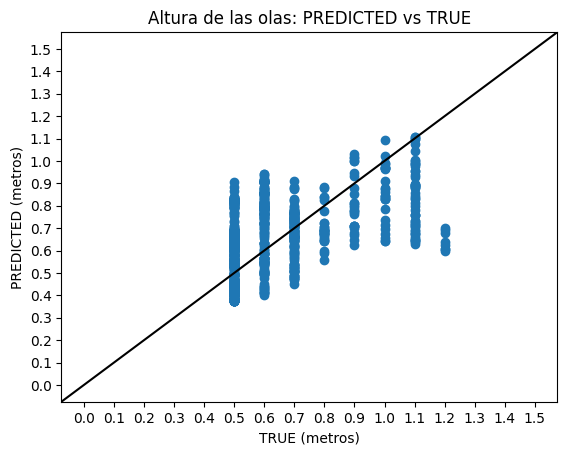

In [19]:
plt.scatter(y_obs_reales, predicciones_obs_reales)
plt.xticks([i/10 for i in range(0,16)])
plt.yticks([i/10 for i in range(0,16)])
plt.axline([0,0], [1.5, 1.5], color='0')
plt.title('Altura de las olas: PREDICTED vs TRUE')

plt.ylabel('PREDICTED (metros)')
plt.xlabel('TRUE (metros)')

#### Ahora pasaríamos a analizar el error en función de la antelación de la predicción

Text(0.5, 0, 'TRUE (metros)')

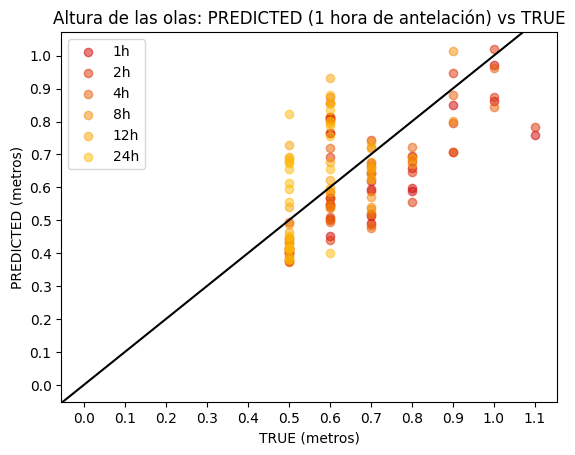

In [20]:
colores = ["#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]
hours = [1,2,4,8,12,24]
for i, h in enumerate(hours):
    plt.scatter(y_obs_reales[antelacion_obs_reales == h], predicciones_obs_reales[antelacion_obs_reales == h], color=colores[i], alpha=0.5, label=f'{h}h')
plt.legend()
plt.xticks([i / 10 for i in range(0, 16)])
plt.yticks([i / 10 for i in range(0, 16)])
plt.axline([0, 0], [1, 1], color='0')
plt.title('Altura de las olas: PREDICTED (1 hora de antelación) vs TRUE')

plt.ylabel('PREDICTED (metros)')
plt.xlabel('TRUE (metros)')

In [21]:
def rmse(y, predicciones):
    return np.sqrt(((y-predicciones)**2).sum())

In [22]:
rmse(y_obs_reales[antelacion_obs_reales == 25], predicciones_obs_reales[antelacion_obs_reales == 25])

0.738352618786684

In [23]:
y_obs_reales, predicciones_obs_reales

(0       0.8
 1       0.8
 2       0.8
 3       0.8
 4       0.8
        ... 
 1138    0.5
 1139    0.5
 1140    0.5
 1141    0.5
 1142    0.5
 Name: AlturaOlas, Length: 1011, dtype: float64,
 array([0.64247433, 0.58775271, 0.55650782, ..., 0.55541608, 0.464914  ,
        0.43087991]))

In [24]:
antelaciones_ordenadas = np.sort(antelacion_obs_reales.unique())

antelaciones_ordenadas = antelaciones_ordenadas.astype(int)

In [25]:
df_evaluacion = pd.DataFrame(columns = ["antelacion","RMSE", "num_preds"])
# df_evaluacion.loc[len(df_evaluacion)] = [4, 'D']
df_evaluacion

,antelacion,RMSE,num_preds


In [26]:
import matplotlib.pyplot as plt

for i in antelaciones_ordenadas:
    df_evaluacion.loc[len(df_evaluacion)] = [i, rmse(y_obs_reales[antelacion_obs_reales == i], predicciones_obs_reales[antelacion_obs_reales == i]), len(antelacion_obs_reales == i)]

In [27]:
df_evaluacion.antelacion = df_evaluacion.antelacion.astype(int)

In [28]:
df_evaluacion.num_preds = df_evaluacion.num_preds.astype(int)

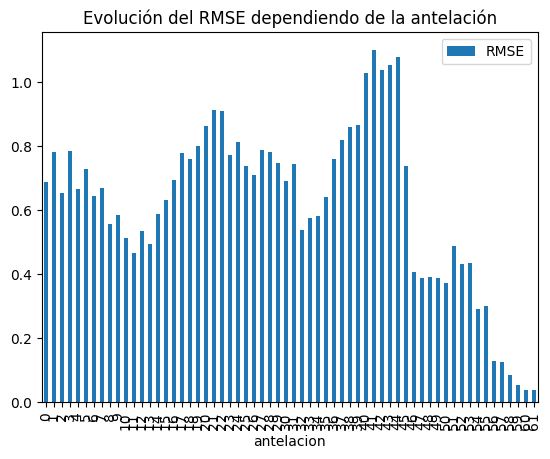

In [65]:
df_evaluacion.plot(kind = "bar", x = "antelacion", y = "RMSE", title = "Evolución del RMSE dependiendo de la antelación");

In [30]:
df_evaluacion[["antelacion" ,"num_preds"]]

,antelacion,num_preds
0,0,1011
1,1,1011
2,2,1011
3,3,1011
4,4,1011
...,...,...
57,57,1011
58,58,1011
59,59,1011
60,60,1011


Comparación del rendimiento usando datos reales vs predicciones
-

In [49]:
df_2024 = pd.read_parquet("../clean/df_2024.parquet")

df_forecast = pd.read_csv('../clean/forecast_merged.csv')

In [50]:
y = df_forecast['AlturaOlas']

In [51]:
filtro_observaciones_reales = ~y.isna() #Predicciones que ya tienen una confirmacion real
filtro_observaciones_reales.sum()

1011

In [52]:
#Fechas desde las cuales las predicciones tienen confirmacion
print(df_forecast[filtro_observaciones_reales].iloc[0,:][["hora", "dia", "mes", "anio"]])
print(df_forecast[filtro_observaciones_reales].iloc[-1,:][["hora", "dia", "mes", "anio"]])

hora      16.0
dia        2.0
mes        5.0
anio    2024.0
Name: 0, dtype: float64
hora      13.0
dia        8.0
mes        5.0
anio    2024.0
Name: 1142, dtype: float64


In [53]:
df_2024
#Comprobamos las fehcas del df_2024 fijandonos en la primera y última fila

,anio,mes,dia,moonphase,hora,temp,dewPt,heat_index,rh,pressure,...,wdir_VAR,wdir_W,wdir_WNW,wdir_WSW,Vviento,AlturaOlas,PeriodoOlas,Temperatura,Lluvia,Nubosidad
0,2024,1,1,0.69,8,37.0,36.0,37.0,93.0,29.400,...,0,0,0,0,10,1.6,9,8,0.1,100
1,2024,1,1,0.69,9,40.0,38.0,40.0,93.0,29.370,...,1,0,0,0,10,1.6,9,8,0.1,100
2,2024,1,1,0.69,10,46.0,43.0,46.0,87.0,29.360,...,0,0,0,0,10,1.5,9,8,0.7,100
3,2024,1,1,0.69,11,46.0,44.0,46.0,90.0,29.320,...,0,0,0,0,15,1.6,9,9,0.7,100
4,2024,1,1,0.69,12,47.0,47.0,47.0,100.0,29.245,...,0,0,0,0,17,1.7,9,9,0.5,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2024,5,7,0.00,15,58.0,47.0,58.0,67.0,30.155,...,0,0,0,0,7,0.5,8,14,0.0,43
1396,2024,5,7,0.00,16,57.0,48.0,57.0,72.0,30.170,...,0,0,0,0,7,0.5,8,13,0.0,63
1397,2024,5,7,0.00,17,55.0,48.0,55.0,77.0,30.170,...,0,0,0,0,6,0.5,8,12,0.0,89
1398,2024,5,7,0.00,18,54.0,50.0,54.0,88.0,30.170,...,0,0,0,0,6,0.5,8,12,0.0,95


In [54]:
#Seleccionamos únicamente los datos reales que coinciden con las predicciones. 
# Como los datos reales acaban un poco antes que las predicciones no hace falta acotar por encima
X_obs_reales = df_2024[(df_2024.hora >= 16)&(df_2024.dia >= 2)&(df_2024.mes >= 5)&(df_2024.anio >= 2024)]
X_obs_reales

,anio,mes,dia,moonphase,hora,temp,dewPt,heat_index,rh,pressure,...,wdir_VAR,wdir_W,wdir_WNW,wdir_WSW,Vviento,AlturaOlas,PeriodoOlas,Temperatura,Lluvia,Nubosidad
1332,2024,5,2,0.81,16,48.0,47.0,48.0,96.5,29.550,...,0,0,0,0,10,0.8,4,9,1.5,100
1333,2024,5,2,0.81,17,48.0,46.0,48.0,93.0,29.565,...,0,0,0,0,7,0.8,4,9,0.2,100
1334,2024,5,2,0.81,18,48.0,46.0,48.0,93.0,29.580,...,1,0,0,0,6,0.8,5,9,0.0,100
1335,2024,5,2,0.81,19,48.0,46.0,48.0,93.0,29.580,...,1,0,0,0,7,0.8,5,8,0.0,100
1345,2024,5,3,0.84,16,51.0,49.0,51.0,94.0,29.670,...,0,1,0,1,7,0.6,4,10,0.2,100
1346,2024,5,3,0.84,17,50.0,49.0,50.0,97.0,29.670,...,1,0,0,0,8,0.6,4,10,0.2,100
1347,2024,5,3,0.84,18,50.0,48.0,50.0,94.0,29.670,...,1,0,0,0,8,0.6,4,9,0.2,100
1348,2024,5,3,0.84,19,50.0,49.0,50.0,97.0,29.670,...,1,1,0,0,7,0.6,4,10,0.1,100
1358,2024,5,4,0.88,16,55.0,50.0,55.0,82.0,29.670,...,0,0,0,0,4,0.5,7,11,0.0,100
1359,2024,5,4,0.88,17,54.0,48.0,54.0,82.0,29.670,...,0,0,0,0,4,0.5,7,11,0.0,82


In [55]:
#Construimos un df para predecir con los datos reales, y guardamos el valor real de la altura de la ola.
X_obs_reales_limpio = X_obs_reales.drop(columns=['Temperatura', 'wspd', 'AlturaOlas']) 
y_reales = X_obs_reales["AlturaOlas"]

In [56]:
X_obs_reales_limpio.columns

Index(['anio', 'mes', 'dia', 'moonphase', 'hora', 'temp', 'dewPt',
       'heat_index', 'rh', 'pressure', 'vis', 'wc', 'feels_like', 'uv_index',
       'wdir_E', 'wdir_ENE', 'wdir_ESE', 'wdir_N', 'wdir_NE', 'wdir_NNE',
       'wdir_NNW', 'wdir_NW', 'wdir_S', 'wdir_SE', 'wdir_SSE', 'wdir_SSW',
       'wdir_SW', 'wdir_VAR', 'wdir_W', 'wdir_WNW', 'wdir_WSW', 'Vviento',
       'PeriodoOlas', 'Lluvia', 'Nubosidad'],
      dtype='object')

In [57]:
# predecimos con los datos reales escalando los datos
predicciones_usando_datos_reales = model.predict(scaler.transform(X_obs_reales_limpio))

In [58]:
calcular_metricas(y_reales, predicciones_usando_datos_reales)

{'TEST_MAX_ERROR': 0.3687061097618606,
 'TEST_ROOT_MEAN_SQ_ERROR': 0.18632711162759938,
 'TEST_MEDIAN_ABS_ERROR': 0.11358766924065433,
 'TEST_MEAN_ABS_ERROR': 0.14420427965584381}

In [59]:
filtro_df_forecast = (df_forecast.hora >= 16)&(df_forecast.dia >= 2)&(df_forecast.mes >= 5)&(df_forecast.anio >= 2024) & (df_forecast.hora <= 19)&(df_forecast.dia <= 7)

In [60]:
df_forecast_fechas_iguales = df_forecast[filtro_df_forecast]
df_forecast_fechas_iguales

,Vviento,PeriodoOlas,Nubosidad,Lluvia,antelacion,hora,dia,anio,mes,temp,...,wdir_SE,wdir_SSE,wdir_SSW,wdir_SW,wdir_VAR,wdir_W,wdir_WNW,wdir_WSW,moonphase,AlturaOlas
0,7,4,100,0.6,0,16,2,2024,5,49,...,0,0,0,0,0,1,0,0,0.81,0.8
1,6,4,100,0.0,1,17,2,2024,5,49,...,0,0,0,0,0,1,0,0,0.81,0.8
2,5,5,100,0.0,2,18,2,2024,5,48,...,0,0,0,0,0,0,1,0,0.81,0.8
3,5,5,100,0.1,3,19,2,2024,5,50,...,0,0,0,0,0,0,1,0,0.81,0.8
8,6,5,100,0.0,0,18,2,2024,5,48,...,0,0,0,0,0,0,1,0,0.81,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,8,8,42,NaN,1,19,7,2024,5,59,...,0,0,1,0,0,0,0,0,0.00,0.5
794,7,8,48,NaN,19,17,7,2024,5,58,...,0,0,1,0,0,0,0,0,0.00,0.5
795,7,8,45,NaN,21,19,7,2024,5,57,...,0,0,0,1,0,0,0,0,0.00,0.5
804,7,8,48,NaN,18,17,7,2024,5,60,...,0,0,1,0,0,0,0,0,0.00,0.5


In [61]:
y_forecast = df_forecast_fechas_iguales["AlturaOlas"]
df_forecast_fechas_iguales = df_forecast_fechas_iguales.drop(columns=['AlturaOlas', 'anio', 'mes', 'dia', 'hora'])

In [62]:
predicciones_forecast = model.predict(scaler.transform(df_forecast_fechas_iguales))

In [63]:
calcular_metricas(y_forecast, predicciones_forecast)

{'TEST_MAX_ERROR': 0.5742213977288604,
 'TEST_ROOT_MEAN_SQ_ERROR': 0.13875308942999878,
 'TEST_MEDIAN_ABS_ERROR': 0.0786464420046511,
 'TEST_MEAN_ABS_ERROR': 0.10248629871462221}

In [64]:
#Volvemos a copiar la celda
calcular_metricas(y_reales, predicciones_usando_datos_reales)

{'TEST_MAX_ERROR': 0.3687061097618606,
 'TEST_ROOT_MEAN_SQ_ERROR': 0.18632711162759938,
 'TEST_MEDIAN_ABS_ERROR': 0.11358766924065433,
 'TEST_MEAN_ABS_ERROR': 0.14420427965584381}

Comprobamos que el modelo tiene mejores métricas si predecimos sobre datos reales en vez de predicciones, aunque podemos ver que el error añadido de las predicciones explicativas no es muy elevado, únicamente afecta en décimas a una métrica. La métrica más afectada es TEST_MAX_ERROR, puesto que el resto de métricas dan mejores resultados incluso usando predicciones sobre las variables explicativas.

NOTA: Para comparar estos datos hemos usado las mismas observaciones temporales, pero en un caso con datos de predicciones y en el otro caso con datos reales.